In [72]:
%matplotlib inline
import numpy as np                                    #arrays and matrix math
import pandas as pd                                   #work with DataFrames
import matplotlib.pyplot as plt                       #plotting and visualization
import matplotlib.dates as mdates                     #datetime formate in plots

import h5py                                           #import h5 files
import os                                             #OS operations
import scipy.signal as signal                         #signal processing
from scipy.io import loadmat                          #load MatLab m-files

from scipy.linalg import svd as SVD

from skimage.metrics import mean_squared_error as image_mse         #Mean Squared Error
from skimage.metrics import structural_similarity as image_ssim     #Structural Similarity Index
from skimage.metrics import peak_signal_noise_ratio as image_psnr   #Peak Signal-Noise Ratio

# Define arguments for text box in PLT.TEXT()
my_box = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Check tensorflow GPU settings
import tensorflow as tf
sys_info = tf.sysconfig.get_build_info()
print('Tensorflow built with CUDA?',  tf.test.is_built_with_cuda())
print('Devices available:', tf.config.experimental.list_physical_devices())
print('# GPU available:', len(tf.config.experimental.list_physical_devices('GPU')))
print("CUDA: {} | cuDNN: {}".format(sys_info["cuda_version"], sys_info["cudnn_version"]))
tf.config.list_physical_devices()

Tensorflow built with CUDA? True
Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]
# GPU available: 1
CUDA: 64_101 | cuDNN: 64_7


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

***

In [2]:
# EXPERIMENT 54 ONLY
data_exp54 = pd.read_pickle('data_exp54.pkl')
print('Experiment 54 shape: {}'.format(data_exp54.shape))

time_complete_exp54 = np.array([loadmat('time_complete_54.mat')['time']], dtype='datetime64[us]').reshape(-1)
print('Times for Experiment 54 shape: {}'.format(time_complete_exp54.shape))

trange_54 = mdates.date2num(time_complete_exp54)
xrange_54 = np.arange(4950, 5150)
print('Timerange 54: {}'.format(trange_54.shape))
print('X-range 54: {}'.format(xrange_54.shape))

Experiment 54 shape: (200, 4200000)
Times for Experiment 54 shape: (4200000,)
Timerange 54: (4200000,)
X-range 54: (200,)


In [3]:
# fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
# date_format = mdates.DateFormatter('%H:%M:%S')

# im1 = ax1.imshow(data_exp54, aspect='auto', cmap='seismic', vmin=-50, vmax=50, extent=[trange_54[0], trange_54[-1], xrange_54[-1], xrange_54[0]])
# ax1.xaxis_date(); ax1.xaxis.set_major_formatter(date_format)
# ax1.set_xlabel('Time [s] on 06/20/2019'); ax1.set_ylabel('Distance [m]'); ax1.set_title('Experiment 54')
# plt.colorbar(im1, ax=ax1)

# fig.autofmt_xdate()
# plt.show();

***

SVD (Singular Value Decomposition)

In [66]:
def do_SVD(data, compression_ratio):
    data_exp = np.array(data)
    U, S, VT = SVD(data_exp, full_matrices=False)
    S = np.diag(S)
    
    k = int(S.shape[0]*compression_ratio)
    data_isvd = U[:,:k] @ S[:k,:k] @ VT[:k,:]

    data_exp_norm  = data_exp  / np.max(np.abs(data_exp))
    data_isvd_norm = data_isvd / np.max(np.abs(data_isvd))
    
    mse  = image_mse(data_exp_norm,  data_isvd_norm) #mse
    ssim = image_ssim(data_exp_norm, data_isvd_norm) #ssim
    psnr = image_psnr(data_exp_norm, data_isvd_norm) #psnr
    metrics = [mse, ssim, psnr]
    
    return U, S, VT, data_isvd, k, metrics

In [67]:
U, S, VT, data_isvd, k, metrics = do_SVD(data_exp54, 0.10)

print('MSE: {:.3e}'.format(metrics[0]))
print('SSIM: {:.2f}'.format(metrics[1]*100))
print('PSNR: {:.2f}'.format(metrics[2]))

C:\Users\mmm6558\AppData\Local\Temp/ipykernel_31884/127785170.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim = image_ssim(data_exp_norm, data_isvd_norm) #ssim
C:\Users\mmm6558\AppData\Local\Temp/ipykernel_31884/127785170.py:14: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  psnr = image_psnr(data_exp_norm, data_isvd_norm) #psnr


In [84]:
U, S, VT = SVD(data_exp54, full_matrices=False)
S = np.diag(S)

In [87]:
print(U.shape, '|', S.shape, '|', VT.shape)

(200, 200) | (200, 200) | (200, 4200000)


In [85]:
data_exp = np.array(data_exp54)
data_exp_norm  = data_exp  / np.max(np.abs(data_exp))

In [105]:
compression_ratio = 0.005
k = int(S.shape[0]*compression_ratio)

data_isvd = U[:,:k] @ S[:k,:k] @ VT[:k,:]
data_isvd_norm = data_isvd / np.max(np.abs(data_isvd))

In [106]:
mse  = image_mse(data_exp_norm,  data_isvd_norm)
ssim = image_ssim(data_exp_norm, data_isvd_norm)
psnr = image_psnr(data_exp_norm, data_isvd_norm)
metrics = [mse, ssim, psnr]

print('MSE  = {:.2e}'.format(metrics[0]))
print('SSIM = {:.2f}%'.format(metrics[1]*100))
print('PSNR = {:.2f} dB'.format(metrics[2]))

C:\Users\mmm6558\AppData\Local\Temp/ipykernel_31884/3790813237.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim = image_ssim(data_exp_norm, data_isvd_norm)
C:\Users\mmm6558\AppData\Local\Temp/ipykernel_31884/3790813237.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  psnr = image_psnr(data_exp_norm, data_isvd_norm)


MSE  = 1.45e-03
SSIM = 79.40%
PSNR = 34.40 dB


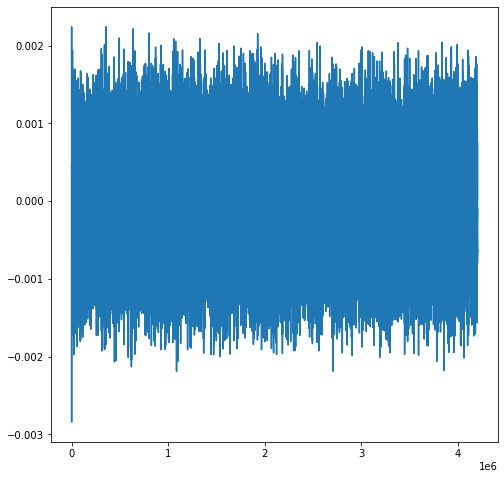

In [117]:
plt.figure(figsize=(8,8), facecolor='white')
plt.plot(VT[:k,:].reshape(-1))
plt.show();

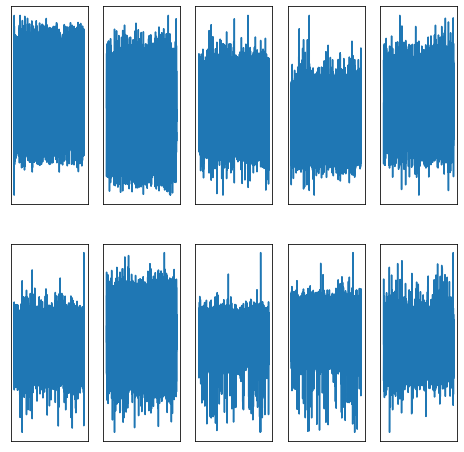

In [96]:
plt.figure(figsize=(8,8), facecolor='white')
V_k = VT[:k,:]
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(V_k[i])
    plt.xticks([]); plt.yticks([])
plt.show();

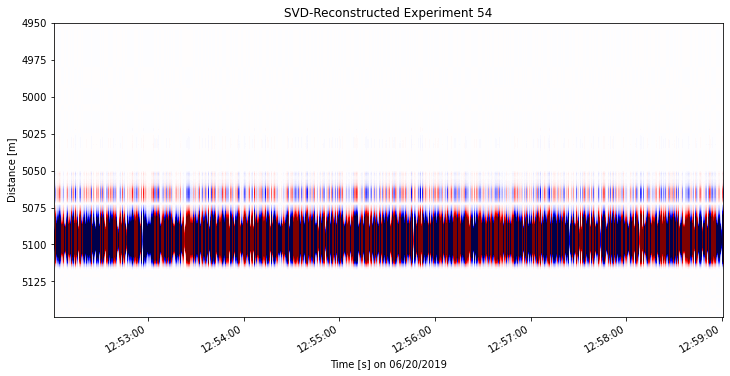

In [118]:
fig, ax1  = plt.subplots(1, 1, figsize=(12,6))
date_format = mdates.DateFormatter('%H:%M:%S')
im1 = ax1.imshow(data_isvd, aspect='auto', cmap='seismic', vmin=-50, vmax=50, extent=[trange_54[0], trange_54[-1], xrange_54[-1], xrange_54[0]])
ax1.xaxis_date(); ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel('Time [s] on 06/20/2019'); ax1.set_ylabel('Distance [m]') 
ax1.set_title('SVD-Reconstructed Experiment 54')
fig.autofmt_xdate()
plt.show();

In [ ]:
def make_FFT_plots():
    fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
    date_format = mdates.DateFormatter('%H:%M:%S')
    im1 = ax1.imshow(np.log10(np.abs(data_fft_shift)), aspect='auto', cmap='seismic')
    ax1.set_xlabel('$Z_t$');        ax1.set_ylabel('$Z_d$')
    ax1.set_xticks([]);             ax1.set_yticks([])
    x1, x2, t1, t2 = ranges
    ax1.hlines(x1, t1, t2, 'k');    ax1.hlines(x2, t1, t2, 'k')
    ax1.vlines(t1, x1, x2, 'k');    ax1.vlines(t2, x1, x2, 'k')
    fig.autofmt_xdate()
    plt.show();
    
    fig, ax1  = plt.subplots(1, 1, figsize=(12,6))
    date_format = mdates.DateFormatter('%H:%M:%S')
    im1 = ax1.imshow(data_isvd, aspect='auto', cmap='seismic', vmin=-50, vmax=50, extent=[trange_54[0], trange_54[-1], xrange_54[-1], xrange_54[0]])
    ax1.xaxis_date(); ax1.xaxis.set_major_formatter(date_format)
    ax1.set_xlabel('Time [s] on 06/20/2019'); ax1.set_ylabel('Distance [m]') 
    ax1.set_title('FFT-Reconstructed Experiment 54')
    fig.autofmt_xdate()
    plt.show();

***

# END